### IMPORT PACKAGES

In [1]:
#import warning
import warnings
warnings.filterwarnings('ignore')

#import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORT DATASETS

In [2]:
submission_format = pd.read_csv("./Dataset/Predict H1N1 and Seasonal Flu Vaccines/submission_format.csv")
test_set_features = pd.read_csv("./Dataset/Predict H1N1 and Seasonal Flu Vaccines/test_set_features.csv")
training_set_features = pd.read_csv("./Dataset/Predict H1N1 and Seasonal Flu Vaccines/training_set_features.csv")
training_set_labels = pd.read_csv("./Dataset/Predict H1N1 and Seasonal Flu Vaccines/training_set_labels.csv")

### CHECKING DATASETS

In [3]:
training_set_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [4]:
training_set_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
test_set_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [6]:
submission_format.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


### DATASET SUMMARY

In [7]:
def summary(df):
    print("summary")
    print("------------------------------")
    print(df.describe())
    print("------------------------------")
    print("columns types")
    print(df.dtypes)
    print("------------------------------")
    print("missing values")
    print(df.isna().sum())
    print("------------------------------")
    print("duplicated values")
    print(df.duplicated().any())
    print("------------------------------")
    print("shape")
    print(df.shape)

In [8]:
summary(training_set_labels)

summary
------------------------------
       respondent_id  h1n1_vaccine  seasonal_vaccine
count   26707.000000  26707.000000      26707.000000
mean    13353.000000      0.212454          0.465608
std      7709.791156      0.409052          0.498825
min         0.000000      0.000000          0.000000
25%      6676.500000      0.000000          0.000000
50%     13353.000000      0.000000          0.000000
75%     20029.500000      0.000000          1.000000
max     26706.000000      1.000000          1.000000
------------------------------
columns types
respondent_id       int64
h1n1_vaccine        int64
seasonal_vaccine    int64
dtype: object
------------------------------
missing values
respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64
------------------------------
duplicated values
False
------------------------------
shape
(26707, 3)


In [9]:
summary(training_set_features)

summary
------------------------------
       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26615.000000    26591.000000               26636.000000   
mean    13353.000000      1.618486        1.262532                   0.048844   
std      7709.791156      0.910311        0.618149                   0.215545   
min         0.000000      0.000000        0.000000                   0.000000   
25%      6676.500000      1.000000        1.000000                   0.000000   
50%     13353.000000      2.000000        1.000000                   0.000000   
75%     20029.500000      2.000000        2.000000                   0.000000   
max     26706.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std

In [10]:
summary(test_set_features)

summary
------------------------------
       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26708.000000  26623.000000    26586.000000               26629.000000   
mean    40060.500000      1.623145        1.266042                   0.049645   
std      7710.079831      0.902755        0.615617                   0.217215   
min     26707.000000      0.000000        0.000000                   0.000000   
25%     33383.750000      1.000000        1.000000                   0.000000   
50%     40060.500000      2.000000        1.000000                   0.000000   
75%     46737.250000      2.000000        2.000000                   0.000000   
max     53414.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26495.000000          26689.000000           26668.000000   
mean               0.729798              0.069279               0.826084   
std

### DELETING COLUMNS

In [11]:
training_set_features = training_set_features.drop(columns = ["respondent_id"], axis = 1)
test_set_features = test_set_features.drop(columns = ["respondent_id"], axis = 1)
training_set_labels = training_set_labels.drop(columns = ["respondent_id"], axis = 1)

### DATA VISUALIZATING

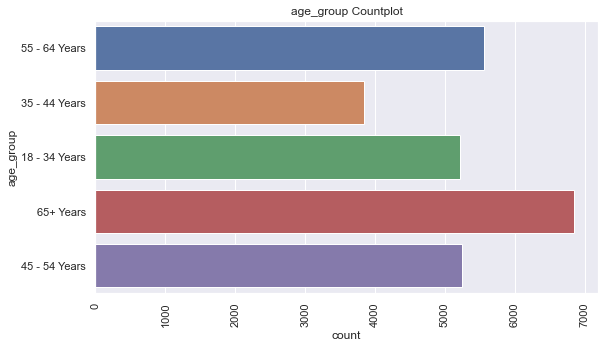

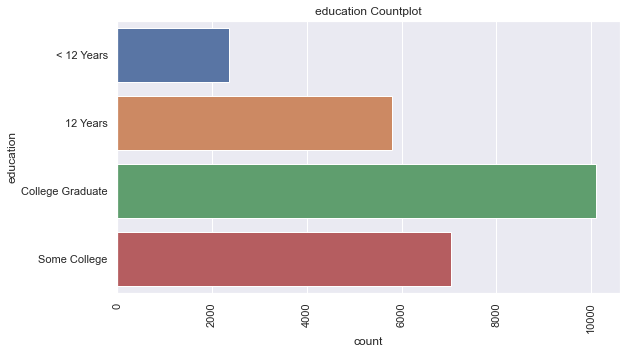

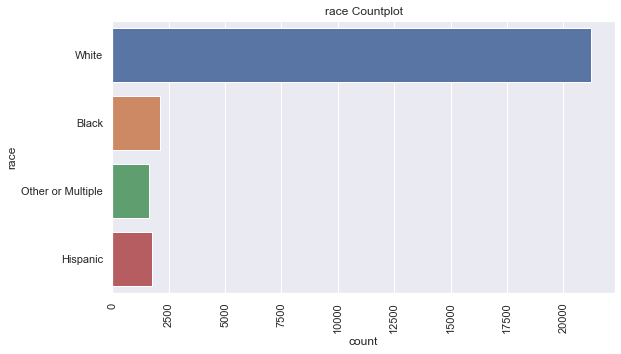

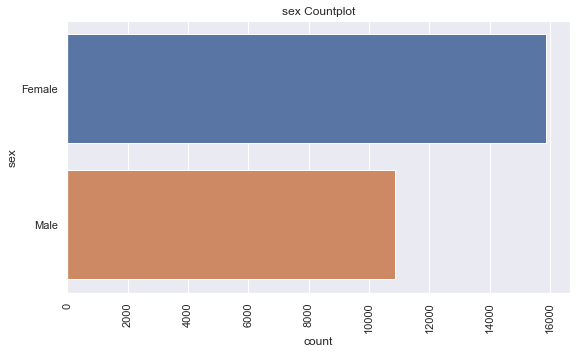

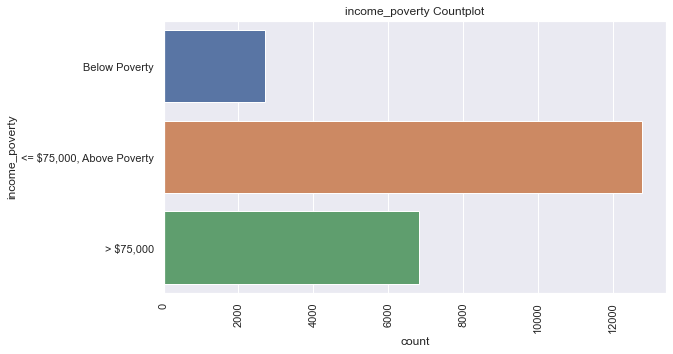

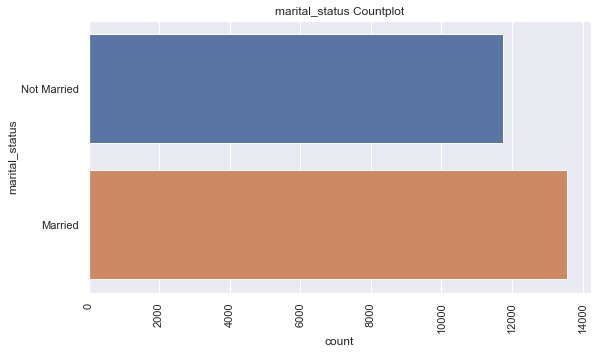

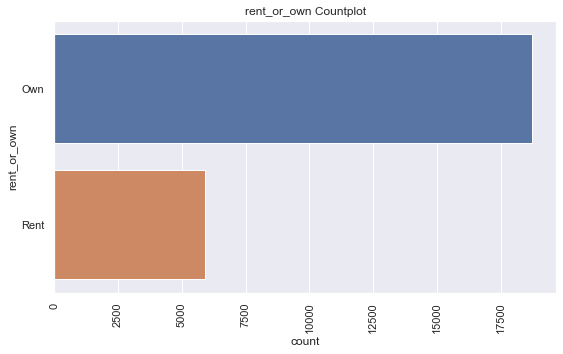

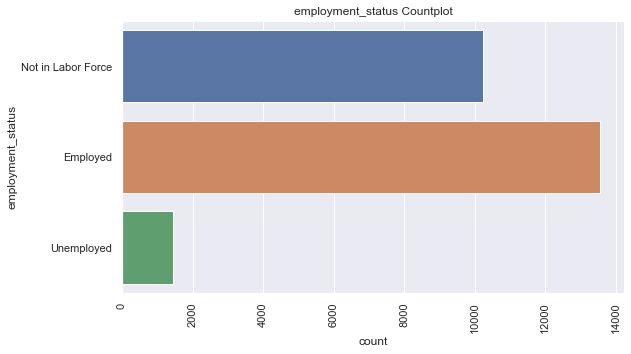

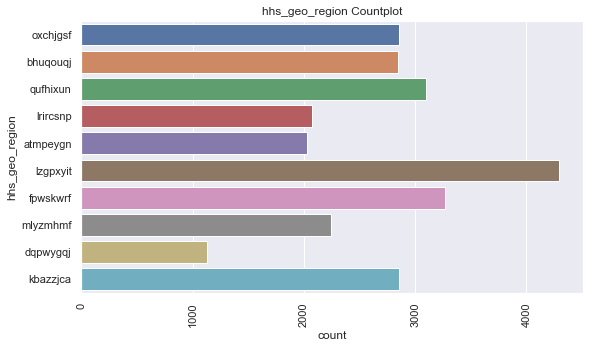

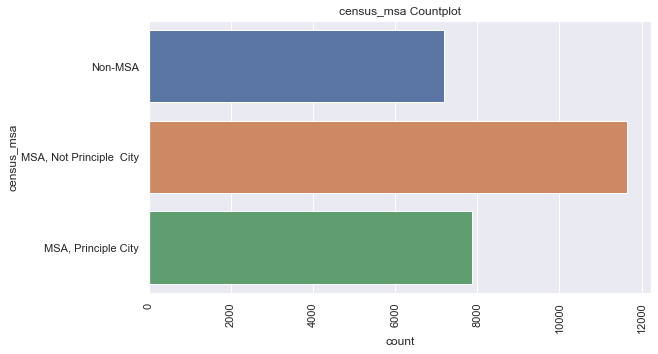

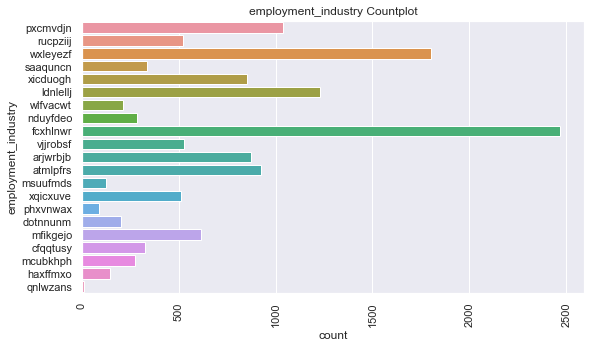

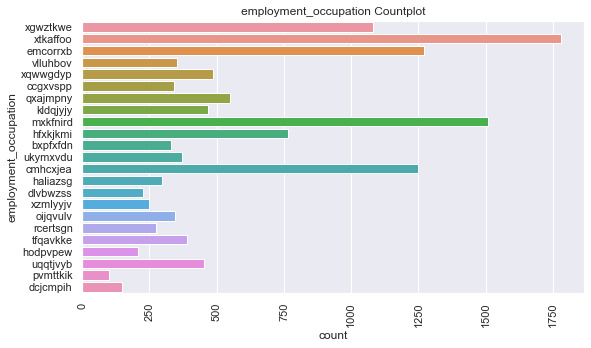

In [12]:
#train features object columns countplot
for col in training_set_features[training_set_features.dtypes[training_set_features.dtypes == "object"].index].columns:
    sns.set(rc={'figure.figsize':(9,5)})
    sns.countplot(y = training_set_features[col])
    plt.title( col +" Countplot")
    plt.xticks(rotation=90)
    plt.show()

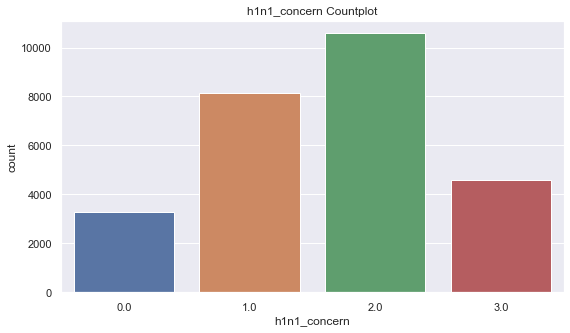

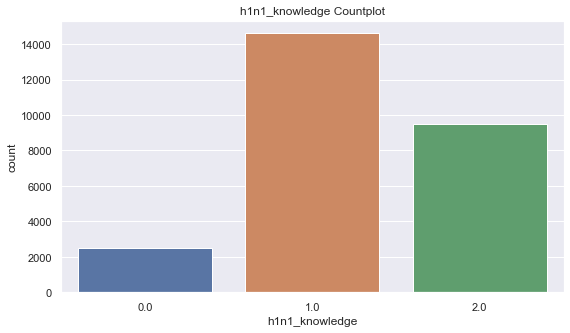

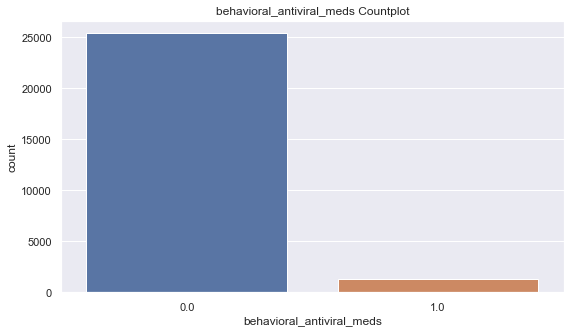

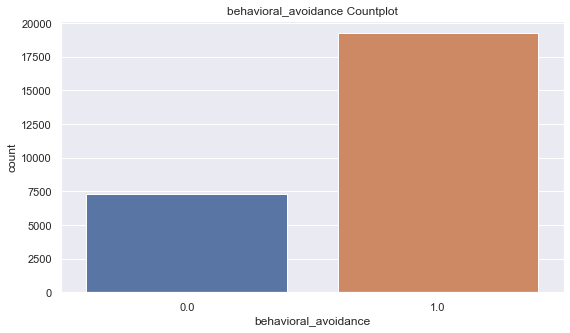

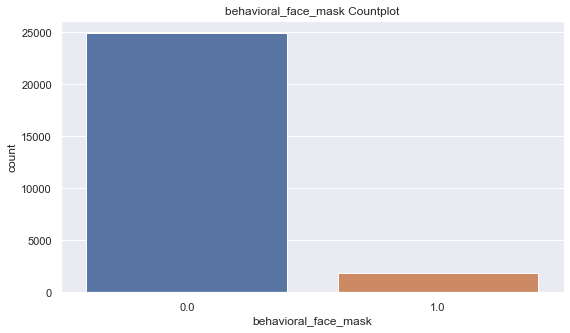

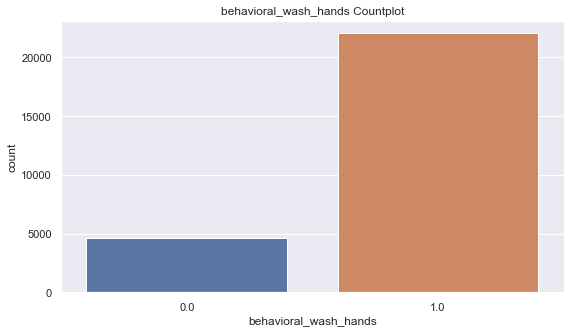

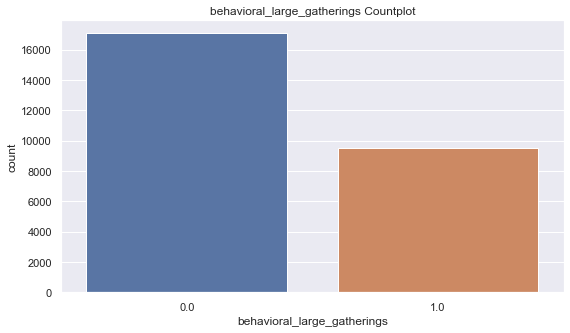

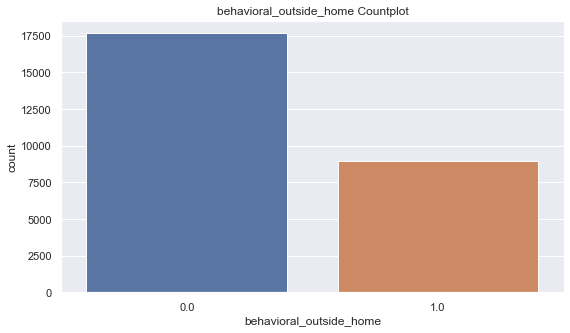

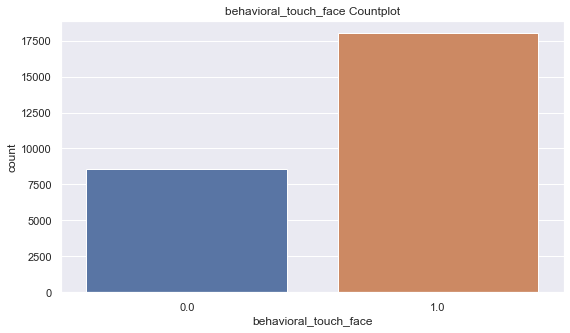

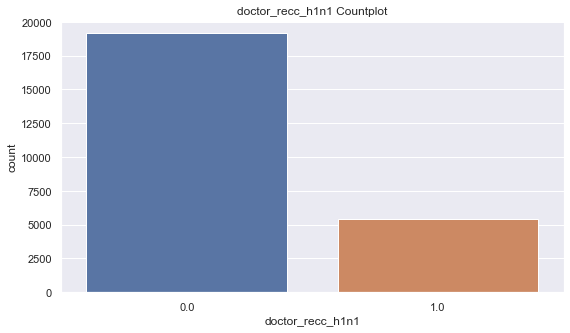

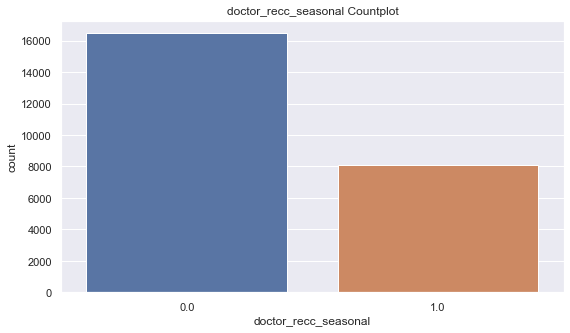

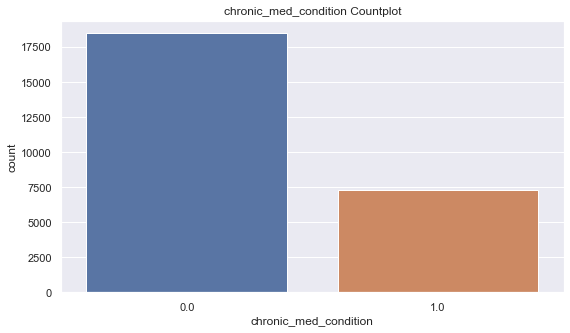

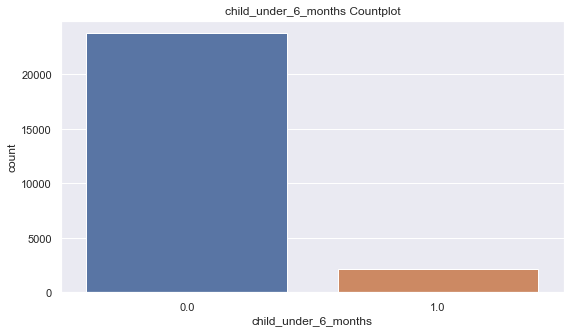

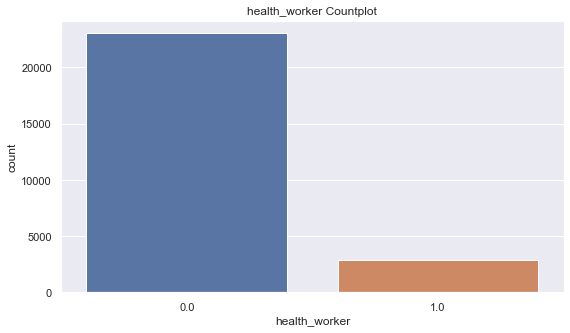

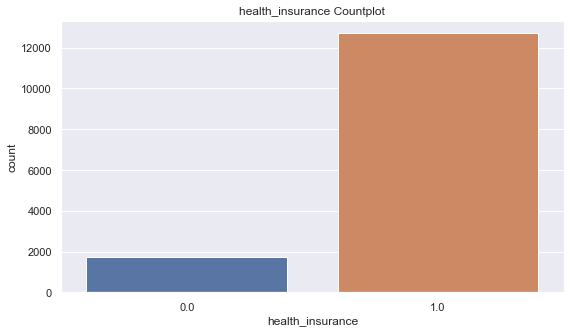

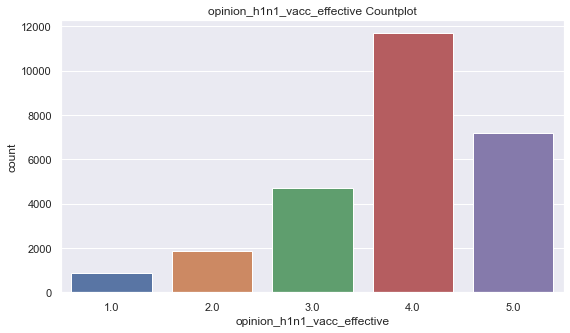

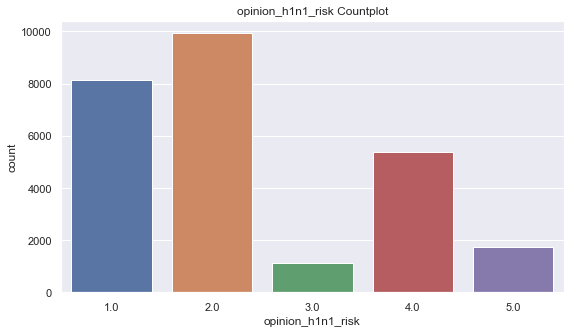

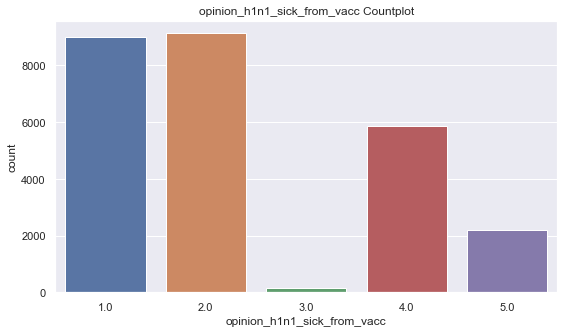

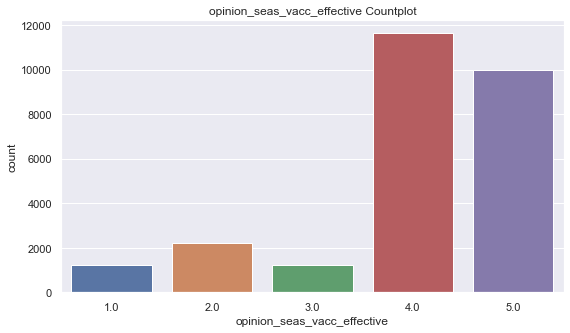

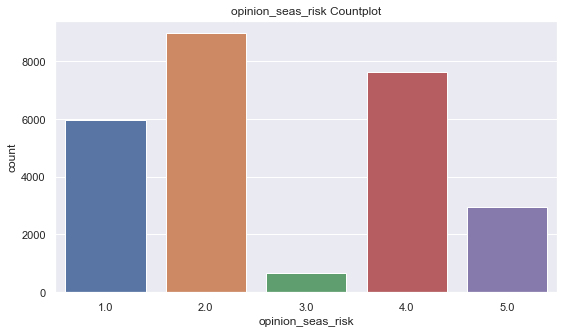

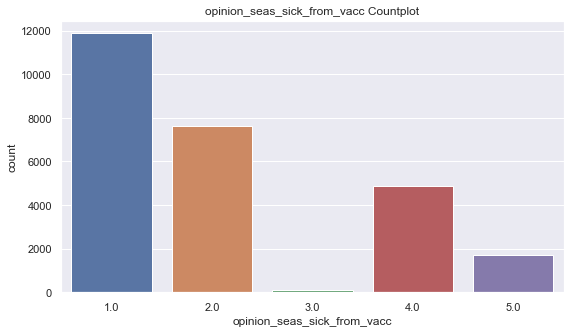

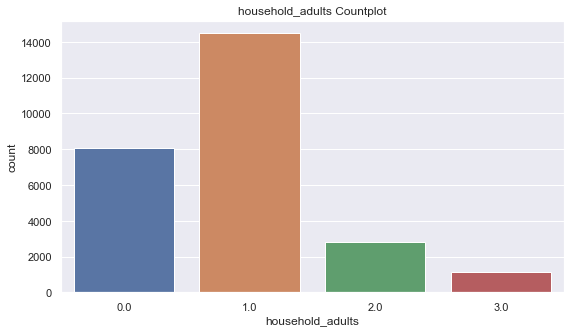

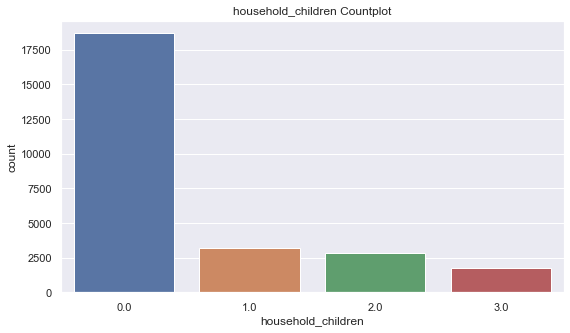

In [13]:
#train features non object columns countplot
for col in training_set_features[training_set_features.dtypes[training_set_features.dtypes != "object"].index].columns:
    sns.countplot(training_set_features[col])
    plt.title( col +" Countplot")
    plt.show()

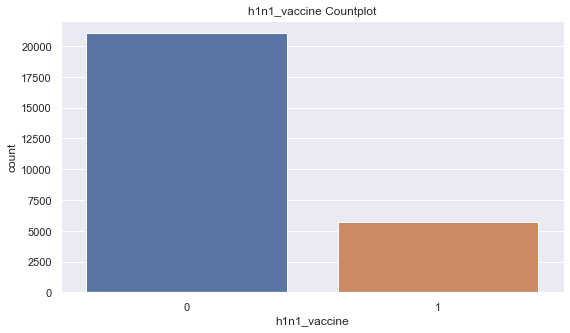

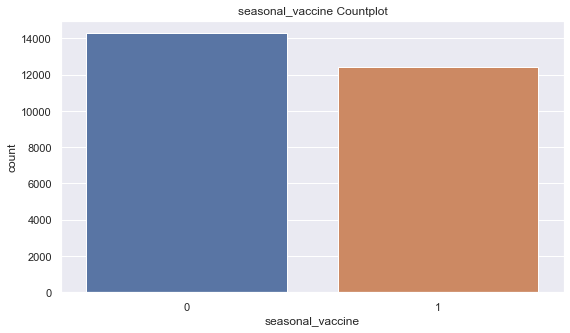

In [14]:
#train labels columns countplot
for col in ["h1n1_vaccine","seasonal_vaccine"]:
    sns.countplot(training_set_labels[col])
    plt.title( col +" Countplot")
    plt.show()

### JOINING DATASET

In [15]:
TRAIN = training_set_features.join(training_set_labels)
print(TRAIN.shape)
TRAIN.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


### PREPROCESSING

In [16]:
#defining object and numerical features
obj_features = training_set_features[training_set_features.dtypes[training_set_features.dtypes == "object"].index].columns

num_features = training_set_features[training_set_features.dtypes[training_set_features.dtypes != "object"].index].columns

print("object features :")
print(obj_features)
print("numerical features :")
print(num_features)

object features :
Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')
numerical features :
Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')


In [17]:
#create pipeline

#import packages
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

#numerical pipeline
num_pipelines = Pipeline([
    ('Standard Scaler', StandardScaler()),
    ('Simple Imputer', SimpleImputer(strategy = 'mean'))
])

#categorical pipeline
cat_pipeline = Pipeline([
     ('Simple Imputer', SimpleImputer(strategy='constant', 
                                      fill_value='missing')),
    ('Label Encoder', OneHotEncoder())
])

In [18]:
#combine those pipeline

#import package
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers = [
        ('Numerical', num_pipelines, num_features),
        ('Categorical', cat_pipeline, obj_features)  
    ],
    remainder = "drop"
)

### DATA SPLITTING

In [19]:
#splitting data using train_test_split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(training_set_features,
                                                 training_set_labels,
                                                 test_size = 0.1,
                                                 random_state = 42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((21365, 35), (5342, 35), (21365, 2), (5342, 2))

### MODELLING - RandomForestClassifier

In [20]:
#fitting preprocessing pipeline
X_train_prep = pd.DataFrame(preprocessor.fit_transform(X_train))
X_val_prep =  pd.DataFrame(preprocessor.transform(X_val))

#checking shape
print ('X_train_prep.shape' , X_train_prep.shape)
print ('X_eval_prep.shape' , X_val_prep.shape)

X_train_prep.shape (21365, 112)
X_eval_prep.shape (5342, 112)


In [21]:
#fitting preprocessing pipeline (test dataset)
test_prep = pd.DataFrame(preprocessor.transform(test_set_features))
print ('test_prep.shape' , test_prep.shape)

test_prep.shape (26708, 112)


In [35]:
#model

#import package
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_prep, y_train)

RandomForestClassifier()

In [36]:
#predict validation data
predict_val = model.predict_proba(X_val_prep)
predict_val

[array([[0.81, 0.19],
        [0.82, 0.18],
        [0.81, 0.19],
        ...,
        [0.38, 0.62],
        [0.81, 0.19],
        [0.91, 0.09]]),
 array([[0.7 , 0.3 ],
        [0.7 , 0.3 ],
        [0.3 , 0.7 ],
        ...,
        [0.45, 0.55],
        [0.42, 0.58],
        [0.5 , 0.5 ]])]

In [38]:
y_preds = pd.DataFrame(
    {
        "h1n1_vaccine": predict_val[0][:, 1],
        "seasonal_vaccine": predict_val[1][:, 1],
    },
    index = y_val.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
15772,0.19,0.30
9407,0.18,0.30
16515,0.19,0.70
23353,0.24,0.30
10008,0.12,0.27


In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_preds)

0.8562554315798092

#### OPTIMIZING MODEL

In [42]:
#import package
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#define parameter for RandomForestClassifier
params = {
    'bootstrap': [True, False],
    'max_depth': [6,8,10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600]
        }

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=params, 
                                   scoring='roc_auc', 
                                   verbose=10)
random_search.fit(X_train_prep, y_train)

print(random_search.best_estimator_)
print(random_search.best_params_)
print(random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True, score=0.857, total=  15.5s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True, score=0.853, total=  14.6s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   30.1s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True, score=0.863, total=  14.2s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   44.4s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True, score=0.857, total=  16.0s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.0min remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True, score=0.858, total=  15.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True, score=0.848, total=  15.1s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.5min remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True, score=0.844, total=  15.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.8min remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True, score=0.855, total=  15.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.0min remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True, score=0.850, total=  15.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.3min remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, bootstrap=True, score=0.849, total=  15.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=False, score=0.842, total=   3.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=False, score=0.837, total=   3.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=6, bootstrap=False, score=0.847, total=   3.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=6, b

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False, score=0.855, total=  12.1s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False, score=0.849, total=  12.0s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, bootstrap=False, score=0.849, total=  12.0s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, score=0.858, total=  21.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 16.4min finished


RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_split=5,
                       n_estimators=800)
{'n_estimators': 800, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
0.8577193898662143


##### VALIDATING

In [44]:
validation_pred = random_search.predict_proba(X_val_prep)
validation_pred

[array([[0.79098634, 0.20901366],
        [0.79753675, 0.20246325],
        [0.82158838, 0.17841162],
        ...,
        [0.46509702, 0.53490298],
        [0.82553605, 0.17446395],
        [0.89232142, 0.10767858]]),
 array([[0.74323787, 0.25676213],
        [0.75456455, 0.24543545],
        [0.28040799, 0.71959201],
        ...,
        [0.42692727, 0.57307273],
        [0.49327503, 0.50672497],
        [0.42787258, 0.57212742]])]

In [54]:
y_preds_validation = pd.DataFrame(
    {
        "h1n1_vaccine": validation_pred[0][:, 1],
        "seasonal_vaccine": validation_pred[1][:, 1],
    },
    index = y_val.index
)
print("y_preds.shape:", y_preds_validation.shape)
y_preds_validation.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
15772,0.209014,0.256762
9407,0.202463,0.245435
16515,0.178412,0.719592
23353,0.192007,0.296153
10008,0.064121,0.185574


In [47]:
#ROC score
roc_auc_score(y_val, y_preds_validation)

0.8636837250513935

### PREDICTING

In [48]:
test_pred = random_search.predict_proba(test_prep)
test_pred

[array([[0.82225905, 0.17774095],
        [0.95476977, 0.04523023],
        [0.7263482 , 0.2736518 ],
        ...,
        [0.82391052, 0.17608948],
        [0.92221353, 0.07778647],
        [0.53735111, 0.46264889]]),
 array([[0.64561704, 0.35438296],
        [0.94134239, 0.05865761],
        [0.26530636, 0.73469364],
        ...,
        [0.70363305, 0.29636695],
        [0.63456063, 0.36543937],
        [0.36476522, 0.63523478]])]

In [55]:
y_preds_test = pd.DataFrame(
    {
        "h1n1_vaccine": test_pred[0][:, 1],
        "seasonal_vaccine": test_pred[1][:, 1],
    },
    index = submission_format.index
)
print("y_preds.shape:", y_preds_test.shape)
y_preds_test.head()

y_preds.shape: (26708, 2)


,h1n1_vaccine,seasonal_vaccine
0,0.177741,0.354383
1,0.045230,0.058658
2,0.273652,0.734694
3,0.560898,0.857942
4,0.273953,0.492079


### SUBMISSION

In [63]:
submission_format = submission_format.drop(columns=["h1n1_vaccine","seasonal_vaccine"],
                                           axis = 1)

In [64]:
flu_submission = submission_format.join(y_preds_test)
print(flu_submission.shape)
flu_submission.head()

(26708, 3)


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.177741,0.354383
1,26708,0.045230,0.058658
2,26709,0.273652,0.734694
3,26710,0.560898,0.857942
4,26711,0.273953,0.492079


In [65]:
flu_submission.to_csv('flu_submission.csv',index=False)